## Topics
1. Types of supervised learning
2. Reading data using pandas
3. Visualizing data using seaborn
4. Linear regression pros and cons
5. Form of linear regression
6. Preparing X and y using pandas
7. Splitting X and y into training and testing sets
8. Linear regression in scikit-learn
9. Interpreting model coefficients
10. Making predictions
11. Model evaluation metrics for regression
12. Computing the RMSE for our Sales predictions
13. Feature selection
14. Resources

### 1. Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

### 2. Reading data using pandas

**Pandas:** popular Python library for data exploration, manipulation, and analysis

- Anaconda users: pandas is already installed
- Other users: [installation instructions](http://pandas.pydata.org/pandas-docs/stable/install.html)

In [10]:
# conventional way to import pandas
import pandas as pd
data = pd.read_csv('data/Advertising.csv',index_col=0)

In [11]:
# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0

# display the first 5 rows
data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet or matrix)
    - First row will always be the column headers
    - First column is an index
- **Series:** a single column (vector)

In [12]:
# display the last 5 rows
data.tail(5)

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [13]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape

(200, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [14]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


### 3. Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: run **`conda install seaborn`** from the command line
- Other users: [installation instructions](http://stanford.edu/~mwaskom/software/seaborn/installing.html)

In [21]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook


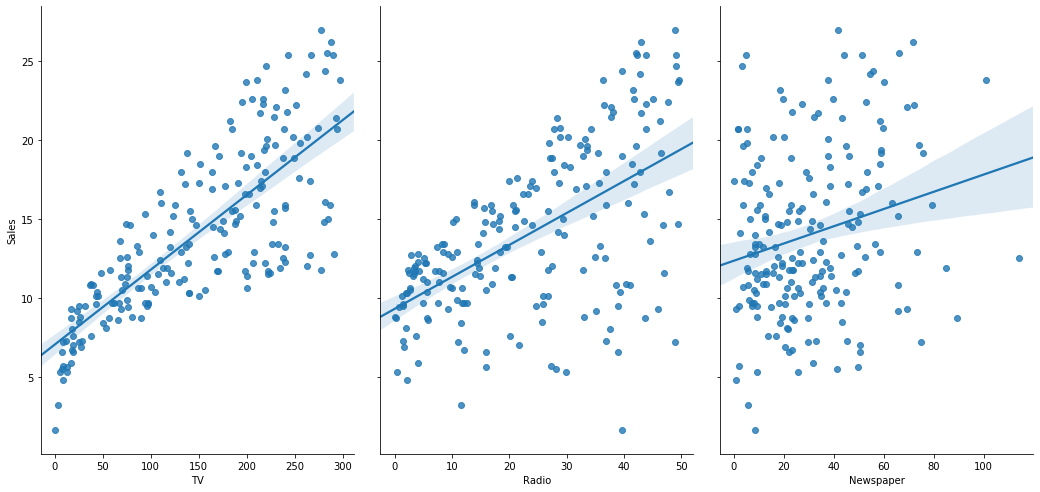

In [20]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,kind='reg',aspect=0.7)

Linear regression
- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales

### 4. Linear regression Pros and Cons

**Pros:** 
- Fast
- No tuning required
- Highly interpretable
- Well-understood

**Cons:** 
- Unlikely to produce the best predictive accuracy
    - Presumes a linear relationship between the features and response
    - If the relationship is highly non-linear as with many scenarios, linear relationship will not effectively model the relationship and its prediction would not be accurate

### 5. Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**
- These values are "learned" during the model fitting step using the "least squares" criterion
- Then, the fitted model can be used to make predictions

### 6. Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays
- However, pandas is built on top of NumPy
- Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [22]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']


X = data[feature_cols]

# use the list to select a subset of the original DataFrame

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame

# print the first 5 rows

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [23]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [24]:
# select a Series from the DataFrame
y = data['Sales']
# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [25]:
# check the type and shape of y
print(type(y))
print(y.shape)


<class 'pandas.core.series.Series'>
(200,)


### 7. Splitting X and y into training and testing sets

In [27]:
# import  
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=1)


In [28]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


### 8. Linear regression in scikit-learn

In [30]:
# import model
from sklearn.linear_model import LinearRegression


# instantiate

linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 9. Interpreting model coefficients

In [32]:
# print the intercept and coefficients
print('intercept',linreg.intercept_)
print('coeffiencent',linreg.coef_)

intercept 2.8769666223179318
coeffiencent [0.04656457 0.17915812 0.00345046]


In [33]:
0.00345046 * 1000

3.4504599999999996

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### 10. Making predictions

In [39]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
59,23.8,21.709103
41,16.6,16.410552
35,9.5,7.609551
103,14.8,17.807696
185,17.6,18.614636
199,25.5,23.835740
96,16.9,16.324887
5,12.9,13.432255
30,10.5,9.171734
169,17.1,17.333853


We need an **evaluation metric** in order to compare our predictions with the actual values.

### 11. Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [17]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [41]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics


10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [42]:
# calculate MSE by hand
import numpy as np

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

1.9730456202283384


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [45]:
# calculate RMSE by hand

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.std(y_test))

1.4046514230328955
4.835621573283005


In [46]:
metrics.r2_score(y_test,y_pred)

0.9156213613792232

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
    - Easier to put in context as it's the same units as our response variable

### 12. Computing the RMSE for our Sales predictions

In [21]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


### 13. Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [22]:
# create a Python list of feature names

# use the list to select a subset of the original DataFrame

# select a Series from the DataFrame

# split into training and testing sets

# fit the model to the training data (learn the coefficients)

# make predictions on the testing set

# compute the RMSE of our predictions


1.38790346994


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

###  14. Resources

Linear regression:

- [Longer notebook on linear regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb) by me
- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) by Hastie and Tibshirani (Stanford)
- [Quick reference guide to applying and interpreting linear regression](http://www.dataschool.io/applying-and-interpreting-linear-regression/) by me
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau (Duke)

Pandas:

- [Three-part pandas tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) by Greg Reda
- [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) documentation

Seaborn:

- [Official seaborn tutorial](http://web.stanford.edu/~mwaskom/software/seaborn/tutorial.html)
- [Example gallery](http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html)